# Machine Learning Project Walkthrough

## Agenda

- In today's class we will be working on a project, in which we complete a machine learning project from A to Z. 
- The dataset we will be using is the Telco Customer Churn dataset. Source: https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/.
- This is a **classification** task in which we will predict customer churn, meaning customers who stay or leave Telco.
- We will work together on the machine learning process from data cleaning, EDA, feature engineering, modeling, and model results interpretation.
- I expect robust participation from all of you. I will help, but the direction will come from you.
- Occassionally you will break out into pairs and complete a task together.

### The Data

From the source:


    This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.
    A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.
    
    The data set includes information about:
    
    - Customers who left within the last month – the column is called Churn
    - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers – gender, age range, and if they have partners and dependents



## Plan of Action

### 1. Clean up

- Fix column names.
- Deal with null values
- Set index
- One hot encoding aka dummy variables aka convert object data to numerical data.

### 2. EDA
- Grab summary stats aka kick the tires. Get an initial feel for the dataset.
- May reveal need to further clean dataset.
- Detect correlations amongst features and between features and target variable.
- Help us to derive any hypotheses or expectations of our modeling. 

### 3. Model Training

- Grab the null hypothesis (classification)
- Assign X and y.
- Fit a model on the whole dataset using a simple model. Use this as the baseline model.
- Try every model we've learned so far. Fine tune each model.
- Use modeling for feature engineering. Drop poor performing features.


### 4. Model Interpretation

- Get to the bottom of the meaning of the model.
- If you were an executive at Telco, what would you want to know about model.
- Figure why it makes certain predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import regression models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, log_loss, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz



churn = pd.read_csv("../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0)

In [2]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [6]:
churn.gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
churn.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
churn.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
churn.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
#churn.isnull()

In [12]:
churn.SeniorCitizen.unique()

array([0, 1])

In [14]:
churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
churn.columns = churn.columns.str.lower()

In [17]:
churn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
churn.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [21]:
obj_cols = churn.columns[churn.dtypes == churn.dtypes[0]]

In [22]:
len(obj_cols)

17

In [32]:
dummies = {}

In [33]:
obj_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
for i in obj_cols[:-2]:
    series = churn[i]
    dums = pd.get_dummies(series, prefix =i, drop_first = True)
    dummies[i]= dums
    

In [35]:
dummies['gender']

,gender_Male
customerID,
7590-VHVEG,0
5575-GNVDE,1
3668-QPYBK,1
7795-CFOCW,1
9237-HQITU,0
9305-CDSKC,0
1452-KIOVK,1
6713-OKOMC,0
7892-POOKP,0


In [39]:
dummies["internetservice"]

,internetservice_Fiber optic,internetservice_No
customerID,,
7590-VHVEG,0,0
5575-GNVDE,0,0
3668-QPYBK,0,0
7795-CFOCW,0,0
9237-HQITU,1,0
9305-CDSKC,1,0
1452-KIOVK,1,0
6713-OKOMC,0,0
7892-POOKP,1,0


In [43]:
set("".join(churn.totalcharges.tolist()))

{' ', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [45]:
churn.totalcharges.str.replace(" ", "")

customerID
7590-VHVEG      29.85
5575-GNVDE     1889.5
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
9305-CDSKC      820.5
1452-KIOVK     1949.4
6713-OKOMC      301.9
7892-POOKP    3046.05
6388-TABGU    3487.95
9763-GRSKD     587.45
7469-LKBCI      326.8
8091-TTVAX     5681.1
0280-XJGEX     5036.3
5129-JLPIS    2686.05
3655-SNQYZ    7895.15
8191-XWSZG    1022.95
9959-WOFKT    7382.25
4190-MFLUW     528.35
4183-MYFRB     1862.9
8779-QRDMV      39.65
1680-VDCWW     202.25
1066-JKSGK      20.15
3638-WEABW     3505.1
6322-HRPFA     2970.3
6865-JZNKO     1530.6
6467-CHFZW    4749.15
8665-UTDHZ       30.2
5248-YGIJN    6369.45
8773-HHUOZ     1093.1
               ...   
1685-BQULA     3756.4
9053-EJUNL    3645.75
0666-UXTJO    2874.45
1471-GIQKQ      49.95
4807-IZYOZ    1020.75
1122-JWTJW      70.65
9710-NJERN        826
9837-FWLCH        239
1699-HPSBG      727.8
7203-OYKCT     7544.3
1035-IPQPU     6479.4
7398-LXGYX    3626.35
2823-LKABH     1679.4
8775-CEBBJ     403.35

In [ ]:
for i in churn.totalcharges:
    

In [48]:
drops = churn.totalcharges.sort_values().iloc[:11].index

In [49]:
churn.drop(drops,inplace = True)

In [51]:
churn.totalcharges = churn.totalcharges.astype(float)

In [52]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null object
dependents          7032 non-null object
tenure              7032 non-null int64
phoneservice        7032 non-null object
multiplelines       7032 non-null object
internetservice     7032 non-null object
onlinesecurity      7032 non-null object
onlinebackup        7032 non-null object
deviceprotection    7032 non-null object
techsupport         7032 non-null object
streamingtv         7032 non-null object
streamingmovies     7032 non-null object
contract            7032 non-null object
paperlessbilling    7032 non-null object
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [54]:
dums_list = []

In [55]:
for i in dummies:
    dums_list.append(dummies[i])

dums_df = pd.concat(dums_list, axis = 1)

In [56]:
dums_df.head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [57]:
dums_df.columns = dums_df.columns.str.lower()

In [58]:
dums_df.head()

,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no phone service,multiplelines_yes,internetservice_fiber optic,internetservice_no,onlinesecurity_no internet service,onlinesecurity_yes,...,streamingtv_no internet service,streamingtv_yes,streamingmovies_no internet service,streamingmovies_yes,contract_one year,contract_two year,paperlessbilling_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [66]:
dums_df.columns = dums_df.columns.str.replace(",","_")

In [60]:
dums_df.columns = dums_df.columns.str.lower()

In [67]:
dums_df.head()

,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,internetservice_fiber_optic,internetservice_no,onlinesecurity_no_internet_service,onlinesecurity_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
dums_df.columns = dums_df.columns.str.replace("(","").str.replace(")","")

In [69]:
dums_df.head()

,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,internetservice_fiber_optic,internetservice_no,onlinesecurity_no_internet_service,onlinesecurity_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_automatic,paymentmethod_electronic_check,paymentmethod_mailed_check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9237-HQITU,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [70]:
dums_df.columns

Index(['gender_male', 'partner_yes', 'dependents_yes', 'phoneservice_yes',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no_internet_service', 'onlinebackup_yes',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_one_year', 'contract_two_year', 'paperlessbilling_yes',
       'paymentmethod_credit_card_automatic', 'paymentmethod_electronic_check',
       'paymentmethod_mailed_check'],
      dtype='object')

In [71]:
dums_df.columns.shape

(26,)

In [72]:
churn.churn.unique()

array(['No', 'Yes'], dtype=object)

In [73]:
churn.churn = churn.churn.map({"No":0, "Yes": 1})

In [75]:
churn.churn.unique()

array([0, 1])

In [76]:
dums_df.index

Index(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU',
       '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU',
       ...
       '9767-FFLEM', '0639-TSIQW', '8456-QDAVC', '7750-EYXWZ', '2569-WGERO',
       '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK'],
      dtype='object', name='customerID', length=7043)

In [77]:
dums_df.drop(drops,inplace = True)

In [78]:
dums_df.shape

(7032, 26)

churn.shape

In [79]:
churn.shape

(7032, 20)

In [80]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null object
dependents          7032 non-null object
tenure              7032 non-null int64
phoneservice        7032 non-null object
multiplelines       7032 non-null object
internetservice     7032 non-null object
onlinesecurity      7032 non-null object
onlinebackup        7032 non-null object
deviceprotection    7032 non-null object
techsupport         7032 non-null object
streamingtv         7032 non-null object
streamingmovies     7032 non-null object
contract            7032 non-null object
paperlessbilling    7032 non-null object
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(3), object(15)
memory usage: 1.4+ MB


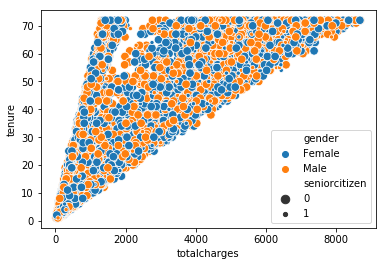

In [82]:
sns.scatterplot(x = churn["totalcharges"], 
                y = churn["tenure"], hue = churn["gender"], size = churn.seniorcitizen)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

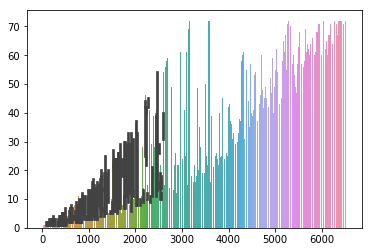

In [84]:
sns.barplot(x = churn["totalcharges"], y = churn["tenure"])

In [85]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthlycharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [87]:
churn_corr = churn.corr()

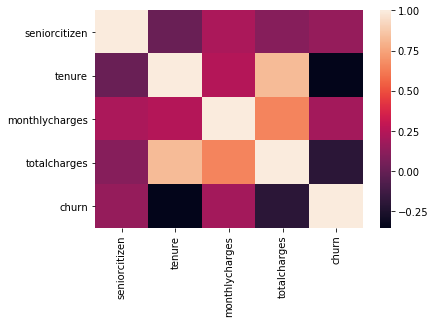

In [88]:
sns.heatmap(churn_corr)

In [89]:
churn_dums = dums_df.corr()

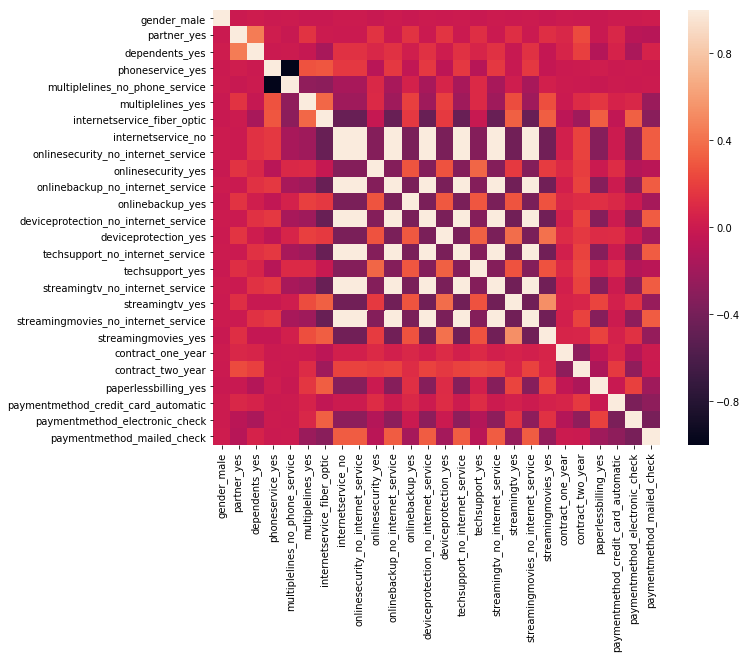

In [91]:
plt.figure(figsize= (10,8))
sns.heatmap(churn_dums)

In [92]:
dums_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender_male,7032.0,0.504693,0.500014,0.0,0.0,1.0,1.0,1.0
partner_yes,7032.0,0.482509,0.499729,0.0,0.0,0.0,1.0,1.0
dependents_yes,7032.0,0.298493,0.457629,0.0,0.0,0.0,1.0,1.0
phoneservice_yes,7032.0,0.903299,0.295571,0.0,1.0,1.0,1.0,1.0
multiplelines_no_phone_service,7032.0,0.096701,0.295571,0.0,0.0,0.0,0.0,1.0
multiplelines_yes,7032.0,0.421928,0.493902,0.0,0.0,0.0,1.0,1.0
internetservice_fiber_optic,7032.0,0.440273,0.496455,0.0,0.0,0.0,1.0,1.0
internetservice_no,7032.0,0.216155,0.411650,0.0,0.0,0.0,0.0,1.0
onlinesecurity_no_internet_service,7032.0,0.216155,0.411650,0.0,0.0,0.0,0.0,1.0
onlinesecurity_yes,7032.0,0.286547,0.452180,0.0,0.0,0.0,1.0,1.0


In [93]:
dums_df.corr()

,gender_male,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,internetservice_fiber_optic,internetservice_no,onlinesecurity_no_internet_service,onlinesecurity_yes,...,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_automatic,paymentmethod_electronic_check,paymentmethod_mailed_check
gender_male,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,-0.011189,0.004745,0.004745,-0.016328,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
partner_yes,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,0.001235,-0.000286,-0.000286,0.143346,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
dependents_yes,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,-0.164101,0.138383,0.138383,0.080786,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
phoneservice_yes,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,0.290183,0.171817,0.171817,-0.091676,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
multiplelines_no_phone_service,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,-0.290183,-0.171817,-0.171817,0.091676,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463
multiplelines_yes,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,0.366420,-0.210794,-0.210794,0.098592,...,-0.210794,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672
internetservice_fiber_optic,-0.011189,0.001235,-0.164101,0.290183,-0.290183,0.366420,1.000000,-0.465736,-0.465736,-0.030506,...,-0.465736,0.329744,-0.465736,0.322457,-0.076809,-0.209965,0.326470,-0.050552,0.335763,-0.305984
internetservice_no,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,-0.465736,1.000000,1.000000,-0.332799,...,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694
onlinesecurity_no_internet_service,0.004745,-0.000286,0.138383,0.171817,-0.171817,-0.210794,-0.465736,1.000000,1.000000,-0.332799,...,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,-0.320592,0.001870,-0.284608,0.319694
onlinesecurity_yes,-0.016328,0.143346,0.080786,-0.091676,0.091676,0.098592,-0.030506,-0.332799,-0.332799,1.000000,...,-0.332799,0.175514,-0.332799,0.187426,0.100658,0.191698,-0.004051,0.115473,-0.112295,-0.079918


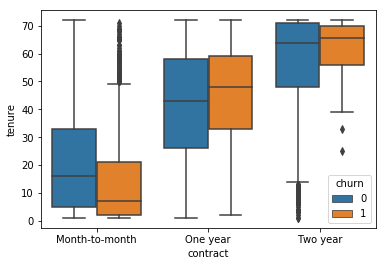

In [94]:
sns.boxplot(x='contract',y = "tenure", hue = 'churn', data = churn)

1. Look at relationship between contract and churn
2. Look at relationship between totalcharges and churn
3. Look at relationship between tenure and totalcharges

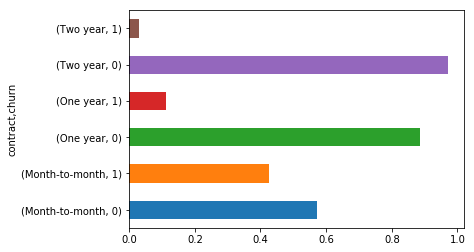

In [96]:
churn.groupby("contract").churn.value_counts(normalize = True).plot(kind = 'barh')

In [99]:
churn.groupby(["churn",'dependents']).totalcharges.mean()

churn  dependents
0      No            2516.262478
       Yes           2630.068810
1      No            1465.871646
       Yes           1843.825000
Name: totalcharges, dtype: float64

In [100]:
churn[["monthlycharges","tenure","totalcharges"]]

,monthlycharges,tenure,totalcharges
customerID,,,
7590-VHVEG,29.85,1,29.85
5575-GNVDE,56.95,34,1889.50
3668-QPYBK,53.85,2,108.15
7795-CFOCW,42.30,45,1840.75
9237-HQITU,70.70,2,151.65
9305-CDSKC,99.65,8,820.50
1452-KIOVK,89.10,22,1949.40
6713-OKOMC,29.75,10,301.90
7892-POOKP,104.80,28,3046.05


In [101]:
churn.groupby("churn").monthlycharges.mean()

churn
0    61.307408
1    74.441332
Name: monthlycharges, dtype: float64

## Modeleling

In [103]:
churn.drop("totalcharges", axis = 1, inplace = True)

In [104]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null object
dependents          7032 non-null object
tenure              7032 non-null int64
phoneservice        7032 non-null object
multiplelines       7032 non-null object
internetservice     7032 non-null object
onlinesecurity      7032 non-null object
onlinebackup        7032 non-null object
deviceprotection    7032 non-null object
techsupport         7032 non-null object
streamingtv         7032 non-null object
streamingmovies     7032 non-null object
contract            7032 non-null object
paperlessbilling    7032 non-null object
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
churn               7032 non-null int64
dtypes: float64(1), int64(3), object(15)
memory usage: 1.4+ MB


In [110]:
cont_features = ["seniorcitizen","monthlycharges", "tenure"]

In [111]:
cont_df = churn[cont_features].copy()

In [112]:
X = pd.concat([cont_df,dums_df], axis = 1)

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 29 columns):
seniorcitizen                           7032 non-null int64
monthlycharges                          7032 non-null float64
tenure                                  7032 non-null int64
gender_male                             7032 non-null uint8
partner_yes                             7032 non-null uint8
dependents_yes                          7032 non-null uint8
phoneservice_yes                        7032 non-null uint8
multiplelines_no_phone_service          7032 non-null uint8
multiplelines_yes                       7032 non-null uint8
internetservice_fiber_optic             7032 non-null uint8
internetservice_no                      7032 non-null uint8
onlinesecurity_no_internet_service      7032 non-null uint8
onlinesecurity_yes                      7032 non-null uint8
onlinebackup_no_internet_service        7032 non-null uint8
onlinebackup_yes                        7

In [114]:
y = churn.churn

In [115]:
y.value_counts(normalize = True)

0    0.734215
1    0.265785
Name: churn, dtype: float64

In [117]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X,y)
dt.score(X,y)

0.8181171786120591

In [118]:
X.shape

(7032, 29)

In [119]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = .25, random_state = 1)

In [120]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7974971558589306

In [121]:
preds = dt.predict(X_test)

In [123]:
confusion_matrix(y_test,preds)

array([[1187,  107],
       [ 249,  215]])

In [124]:
recall_score(y_test,preds)

0.46336206896551724

In [130]:
param_grid = {}
param_grid["max_depth"] = list(range(2,35))

In [134]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid= param_grid, cv = 5, scoring = "recall")
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [135]:
grid.best_params_

{'max_depth': 10}

In [136]:
grid_model = grid.best_estimator_

In [137]:
grid_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [138]:
fi_df = pd.DataFrame(list(zip(X.columns, grid_model.feature_importances_)))

In [145]:
new_features = fi_df.sort_values(1, ascending=False).iloc[:3,0].values

In [146]:
X2 = X[new_features]
X2.head()

,tenure,internetservice_fiber_optic,monthlycharges
customerID,,,
7590-VHVEG,1,0,29.85
5575-GNVDE,34,0,56.95
3668-QPYBK,2,0,53.85
7795-CFOCW,45,0,42.30
9237-HQITU,2,1,70.70


In [150]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X2,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
cross_val_score(DecisionTreeClassifier(), X2,y,cv = 5, scoring = "recall").mean()

0.48367191868216936

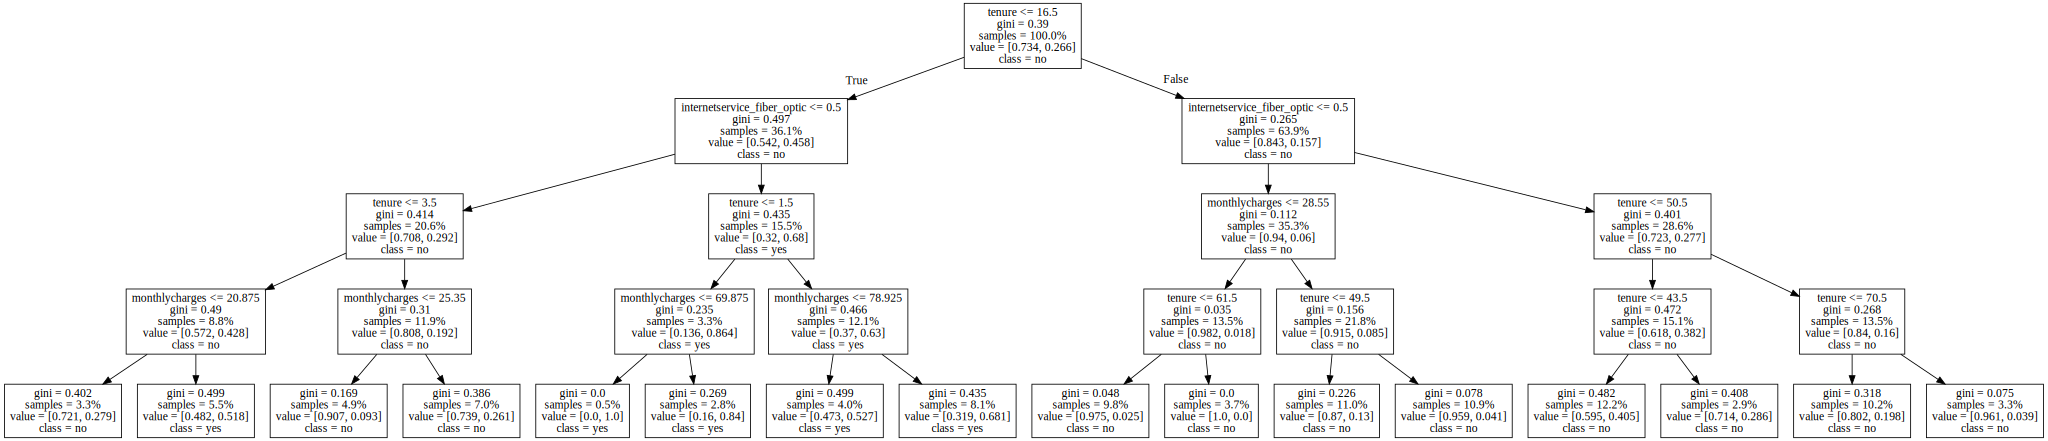

In [152]:
export_graphviz(dt, out_file='churn.dot',feature_names = X2.columns,class_names=["no","yes"],proportion =True)

with open("churn.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)